In [184]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [185]:
import matplotlib.pyplot as plt

In [186]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [260]:
%load_ext autoreload
%autoreload 2
from data import get_data_loaders
from models import get_model
from losses import get_loss
from runs import whichRun

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [251]:
ROOT = r"Your\root\like\datasets\cifar10\cifar-10-python\cifar10"

In [189]:
class setGlobals():
    def set(self,DATASET,ROOT,BATCH_SIZE,MODEL_TYPE,OPT,LOSS,SMOOTHING,EPOCHS,LEARNING_RATE,DECAY_FACTOR
                ,TYPE,REGPARAM,EARLYSTOP,AUGMENT,DROPOUT,DROP_PERCENT,MOMENTUM, PARAMS_TO_UPDATE):
        self.DATASET = DATASET
        self.ROOT = ROOT
        self.BATCH_SIZE = BATCH_SIZE

        self.MODEL_TYPE = MODEL_TYPE
        self.OPT = OPT
        self.LOSS = LOSS
        self.SMOOTHING = SMOOTHING
        self.EPOCHS = EPOCHS
        self.LEARNING_RATE = LEARNING_RATE
        self.DECAY_FACTOR = DECAY_FACTOR
        
        self.TYPE = TYPE
        self.REGPARAM = REGPARAM
        self.EARLYSTOP = EARLYSTOP
        self.AUGMENT = AUGMENT
        self.DROPOUT = DROPOUT
        self.DROP_PERCENT = DROP_PERCENT
        self.MOMENTUM = MOMENTUM
        
        self.PARAMS_TO_UPDATE = PARAMS_TO_UPDATE

In [286]:
class loadVals():
    def g_data(self,args):
      #get the dataset you want mnist/cifar10
        loader_train, loader_val, loader_test = get_data_loaders(dataset=args.DATASET,               
                                                                root = args.ROOT,
                                                                batch_size = args.BATCH_SIZE,        
                                                                augment = args.AUGMENT)              
        return loader_train, loader_val, loader_test
    
    def g_model(self,args,device):
        #get the model, types are 
        model,nparams,args.PARAMS_TO_UPDATE = get_model(args.DATASET,                          
                                                        m_type = args.MODEL_TYPE,                
                                                        device = device,                            
                                                        dropout = args.DROPOUT,                  
                                                        percent_dropout = args.DROP_PERCENT,
                                                        opt = args.OPT)
        return model,nparams
    
    def g_loss(self,args,device):
        loss = get_loss(ls = args.LOSS, 
                        regparam = args.REGPARAM,
                        device = device)
        return loss
    
    def g_optim(self,args,model):
        if glob.TYPE == "L2":
            regparam = args.REGPARAM
        else:
            regparam = 0
        optim = get_optimizer(opt = args.OPT,                                
                     eta = args.LEARNING_RATE,                       
                     regparam = regparam,
                     momentum = args.MOMENTUM,
                     parameters = args.PARAMS_TO_UPDATE)
        return optim

In [191]:
def graph_acc_loss(train_acc, val_acc, train_loss, val_loss, args):
    fig,axis = plt.subplots(1,2)
    fig.set_size_inches(12,6)
    
    axis[0].plot(train_acc, label = "train")
    axis[0].plot(val_acc, label = "validation")
    axis[0].set_ylabel("Accuracy")
    axis[0].set_xlabel("Epochs")
    axis[0].set_title("Accuracy vs Epcohs")
    
    axis[1].plot(train_loss, label = "train")
    axis[1].plot(val_loss, label = "validation")
    axis[1].set_ylabel("Loss")
    axis[1].set_xlabel("Epochs")
    axis[1].set_title("Loss vs Epcohs")
    
    plt.legend()
    plt.show()

In [192]:
glob = setGlobals()
l_vals = loadVals()

In [193]:
run = whichRun(glob,l_vals,device,
               root=ROOT)

In [125]:
##### TEST THE CLAIM OF BETTER GENERALISATION WITH HIGHER INITIAL LEARNING RATE #############
train_acc1, train_loss1, val_acc1, val_loss1, test_acc1 = run.run('1_1')  #using sgd with lr = 1e-1
train_acc2, train_loss2, val_acc2, val_loss2, test_acc2 = run.run('1_2')  #using sgd with lr = 1e-3

Not using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
L2 regularization: 	 0
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Validataion accuracy is: 49.38 %
Validataion accuracy is: 30.88 %
decay_factor: 0.85
Validataion accuracy is: 58.5 %
Validataion accuracy is: 57.3 %
Validataion accuracy is: 60.82 %
decay_factor: 0.85
Validataion accuracy is: 43.14 %
Validataion accuracy is: 53.96 %
Validataion accuracy is: 58.44 %
decay_factor: 0.85
Validataion accuracy is: 67.12 %
Validataion accuracy is: 61.62 %
Validataion accuracy is: 63.4 %
decay_factor: 0.85
Validataion accuracy is: 64.98 %
Validataion accuracy is: 69.26 %
Validataion accuracy is: 69.5 %
decay_factor: 0.85
Validataion accuracy is: 29.74 %
Validataion accuracy is: 65.88 %
Validataion accuracy is: 64.8 %
decay_factor: 0.85
Validataion accuracy is: 70.6 %
Validataion accuracy is: 70.5 %
Validataion accuracy is: 68.82 %
decay_factor: 0.85
Validataion accuracy is: 70.02 %
Validataion acc

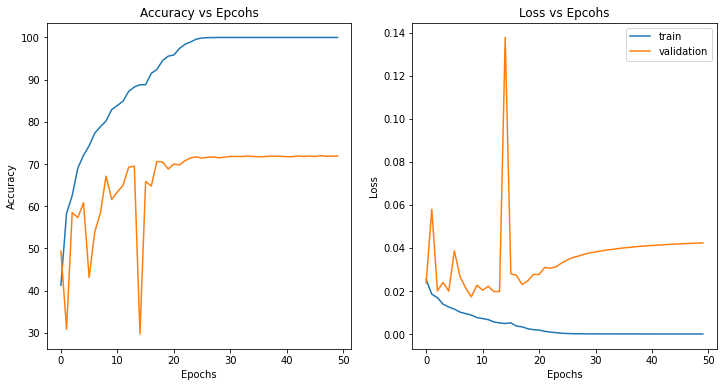

In [128]:
graph_acc_loss(train_acc1, val_acc1, train_loss1, val_loss1, glob)

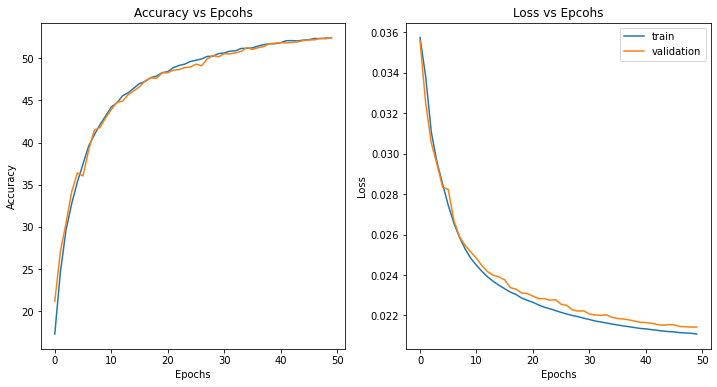

In [129]:
graph_acc_loss(train_acc2, val_acc2, train_loss2, val_loss2, glob)

In [130]:
##### TEST THE CLAIM OF BETTER GENERALISATION WITH HIGHER INITIAL LEARNING RATE #############
train_acc1, train_loss1, val_acc1, val_loss1, test_acc1 = run.run('2_1')  #using dfw with lr = 1e-1
train_acc2, train_loss2, val_acc2, val_loss2, test_acc2 = run.run('2_2')  #using dfw with lr = 1e-3

Not using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
L2 regularization: 	 0
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Validataion accuracy is: 55.3 %
Validataion accuracy is: 64.0 %
Validataion accuracy is: 68.98 %
Validataion accuracy is: 70.44 %
Validataion accuracy is: 71.76 %
Validataion accuracy is: 71.72 %
Validataion accuracy is: 73.12 %
Validataion accuracy is: 73.3 %
Validataion accuracy is: 73.38 %
Validataion accuracy is: 73.58 %
Validataion accuracy is: 72.78 %
Validataion accuracy is: 73.12 %
Validataion accuracy is: 73.92 %
Validataion accuracy is: 73.82 %
Validataion accuracy is: 73.78 %
Validataion accuracy is: 73.24 %
Validataion accuracy is: 74.1 %
Validataion accuracy is: 73.94 %
Validataion accuracy is: 73.74 %
Validataion accuracy is: 73.52 %
Validataion accuracy is: 73.8 %
Validataion accuracy is: 73.3 %
Validataion accuracy is: 73.56 %
Validataion accuracy is: 73.52 %
Validataion accuracy is: 73.58 %
Validataion 

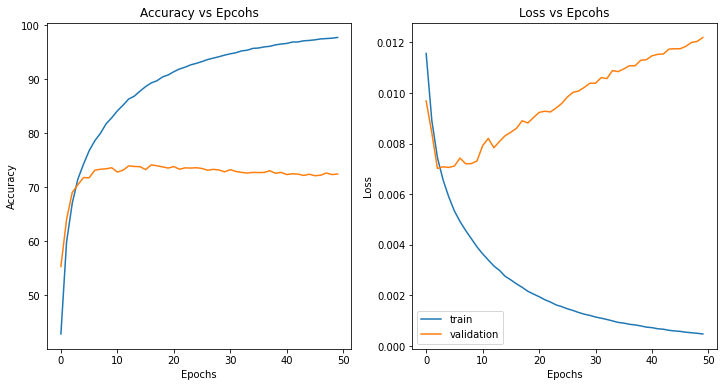

In [131]:
graph_acc_loss(train_acc1, val_acc1, train_loss1, val_loss1, glob)

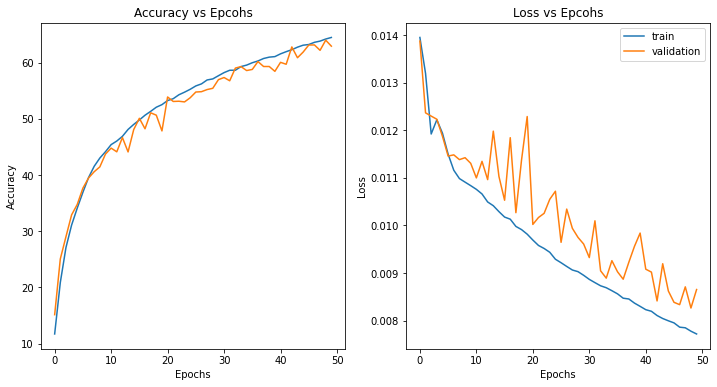

In [132]:
graph_acc_loss(train_acc2, val_acc2, train_loss2, val_loss2, glob)

In [204]:
def graph2(temp,regtype):
    if regtype=='l2':
        reg = [5e-1, 5e-2, 5e-3, 5e-4]
    else:
        reg = [5e-3, 5e-4]
    
    fig, axis = plt.subplots(2,2)
    fig.set_size_inches(16,8)
    for i in range(len(temp)):
        axis[0][0].plot(temp[i][0],label='{}={}'.format(regtype,reg[i]))
        axis[0][1].plot(temp[i][1],label='{}={}'.format(regtype,reg[i]))
        axis[1][0].plot(temp[i][2],label='{}={}'.format(regtype,reg[i]))
        axis[1][1].plot(temp[i][3],label='{}={}'.format(regtype,reg[i]))
        plt.legend()

    axis[0][0].set_title('Training Accuracy')
    axis[0][1].set_title('Training Loss')
    axis[1][0].set_title('Validation Accuracy')
    axis[1][1].set_title('Validation Loss')

    plt.show()
    
    print("Test accuracy:")
    for i in range(len(reg)):
        print("\n {}={} \t|{}%".format(regtype,reg[i],temp[i][4]))

In [182]:
##### TESTING THE EFFECT OF DIFFERENT L2 REGULARISATION ON SGD #############
temp = run.run('3')  #using sgd with lr = 1e-1

Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.5
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Testing Accuracy of the network on the 10000 test images: 10.0 %
Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.05
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Testing Accuracy of the network on the 10000 test images: 48.73 %
Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.005
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Testing Accuracy of the network on the 10000 test images: 67.71 %
Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.0005
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Testing Accuracy of the network on the 10000 test images: 72.5 %


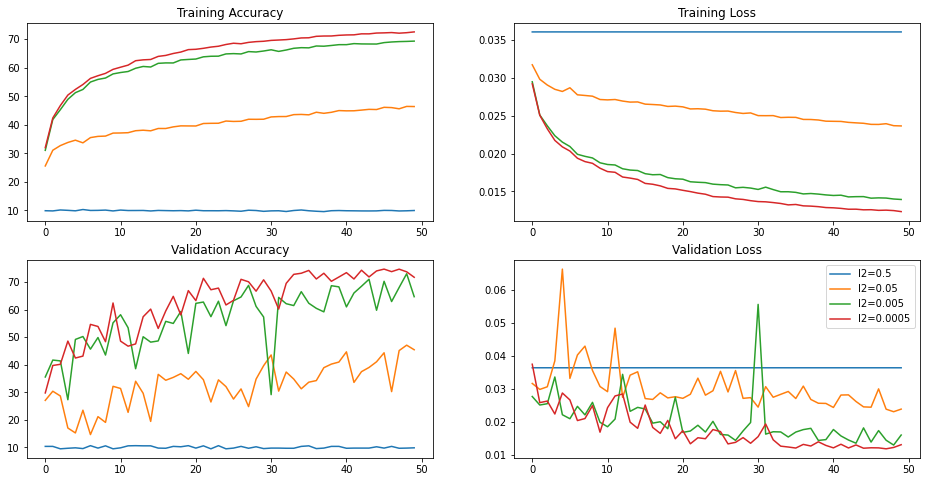

Test accuracy
 	 l2=0.5 	|10.0%                         
 	 l2=0.05 	|48.73%                         
 	 l2=0.005 	|67.71%                         
 	 l2=0.0005 	|72.5%


In [183]:
graph2(temp,'l2')

In [164]:
##### TESTING THE EFFECT OF DIFFERENT L2 REGULARISATION ON DFW #############
temp = run.run('4')  #using dfw with lr = 1e-1

Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.5
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Testing Accuracy of the network on the 10000 test images: 10.0 %
Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.05
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Testing Accuracy of the network on the 10000 test images: 40.9 %
Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.005
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Testing Accuracy of the network on the 10000 test images: 64.73 %
Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.0005
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Testing Accuracy of the network on the 10000 test images: 71.86 %


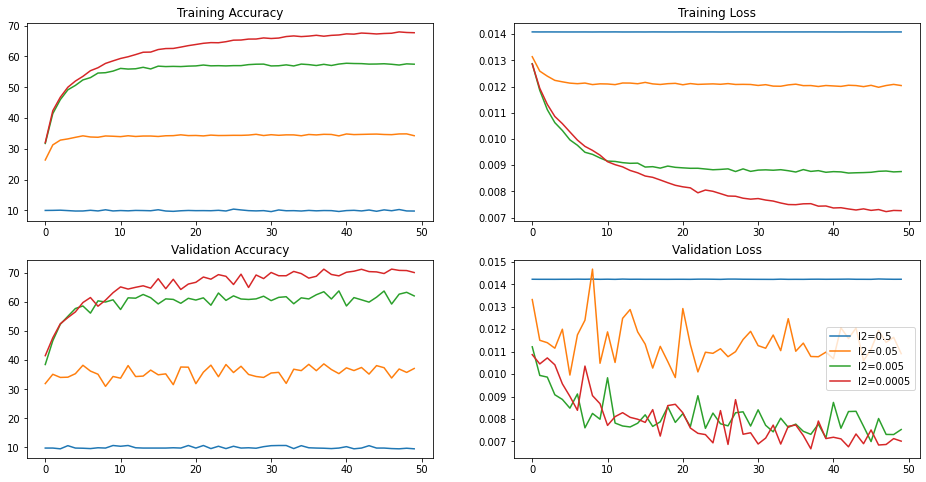

Test accuracy
 	 l2=0.5 	|10.0%                         
 	 l2=0.05 	|40.9%                         
 	 l2=0.005 	|64.73%                         
 	 l2=0.0005 	|71.86%


In [167]:
graph2(temp,'l2')

In [198]:
##### TESTING THE EFFECT OF DIFFERENT L1 REGULARISATION ON SGD #############
temp = run.run('5')  #sgd

Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.005
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Testing Accuracy of the network on the 10000 test images: 10.0 %
Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.0005
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Testing Accuracy of the network on the 10000 test images: 62.29 %


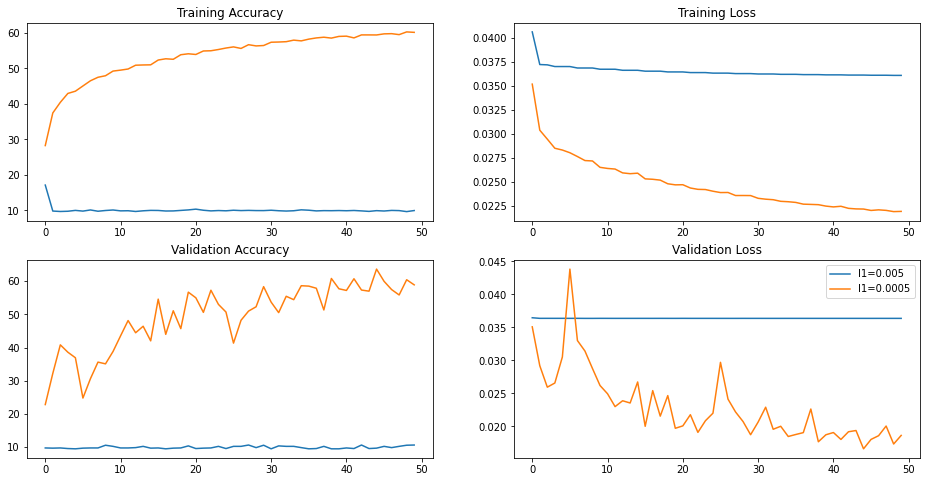

Test accuracy:

 l1=0.005 	|10.0%

 l1=0.0005 	|62.29%


In [205]:
graph2(temp,'l1')

In [206]:
##### TESTING THE EFFECT OF DIFFERENT L1 REGULARISATION ON SGD #############
temp = run.run('6')  #dfw

Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.005
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Testing Accuracy of the network on the 10000 test images: 24.06 %
Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.0005
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Testing Accuracy of the network on the 10000 test images: 56.71 %


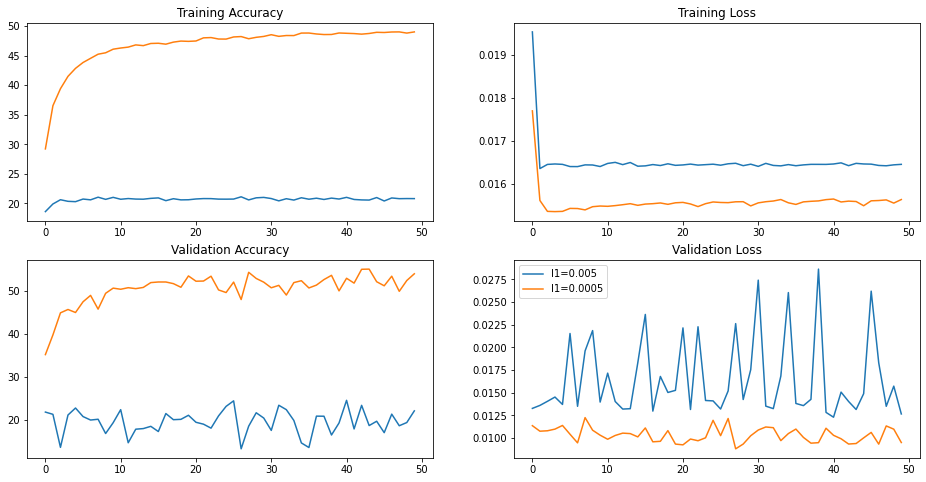

Test accuracy:

 l1=0.005 	|24.06%

 l1=0.0005 	|56.71%


In [207]:
graph2(temp,'l1')

In [306]:
##### FINETUNE ON VGG #############
train_acc1, train_loss1, val_acc1, val_loss1, test_acc1 = run.run('7')  #using sgd

Using data augmentation on CIFAR data set.
Using pretrained VGG11, finetuning is assumed to be false
Number of model parameters: 9278294
Regularization param: 	 0.0005
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Testing Accuracy of the network on the 10000 test images: 91.72 %


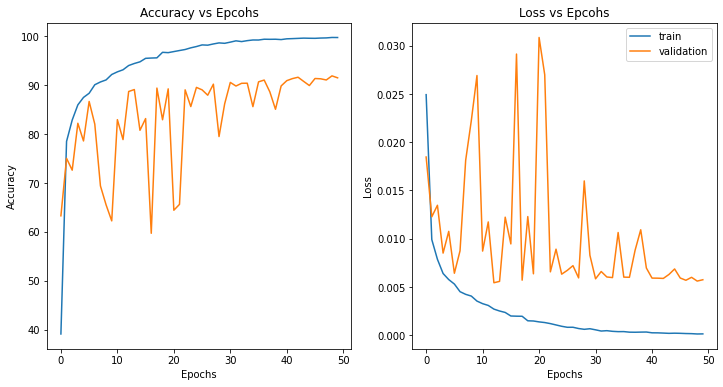

In [307]:
graph_acc_loss(train_acc1, val_acc1, train_loss1, val_loss1, glob)

In [308]:
##### FINETUNE ON VGG #############
train_acc1, train_loss1, val_acc1, val_loss1, test_acc1 = run.run('8')  #using dfw

Using data augmentation on CIFAR data set.
Using pretrained VGG11, finetuning is assumed to be false
Number of model parameters: 9278294
Regularization param: 	 0.0005
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Testing Accuracy of the network on the 10000 test images: 90.15 %


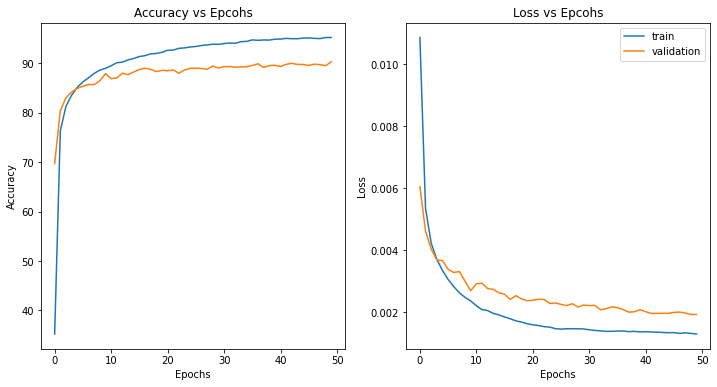

In [309]:
graph_acc_loss(train_acc1, val_acc1, train_loss1, val_loss1, glob)

In [239]:
##### FINETUNE ON VGG #############
train_acc1, train_loss1, val_acc1, val_loss1, test_acc1 = run.run('11')  #using dfw

Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.0005
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Testing Accuracy of the network on the 10000 test images: 72.61 %


In [240]:
##### FINETUNE ON VGG #############
train_acc1, train_loss1, val_acc1, val_loss1, test_acc1 = run.run('11')  #using dfw

Using data augmentation on CIFAR data set.
Model: cnn
Number of model parameters: 60170
Regularization param: 	 0.0005
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Testing Accuracy of the network on the 10000 test images: 72.04 %


In [294]:
ROOTMNIST = r"E:\Suraj\University\Saarland\STUDIES\3d sem subjects\z_opt_ml\coderepo\datasets\mnist"
runmnist = whichRun(glob,l_vals,device,
               root=ROOTMNIST)

In [296]:
##### BEST MODEL,MNIST #############
train_acc1, train_loss1, val_acc1, val_loss1, test_acc1 = runmnist.run('9')  #using sgd

E:\Suraj\University\Saarland\STUDIES\3d sem subjects\z_opt_ml\coderepo\datasets\mnist
Loading model trained on CIFAR10, to use on MNIST
loading best_dfw
model to be finetuned on MNIST
Regularization param: 	 0.0005
Loss function: CrossEntropyLoss()
Optimizer: 	 SGD
Testing Accuracy of the network on the 10000 test images: 98.92 %


([96.264,
  97.98,
  98.222,
  98.444,
  98.502,
  98.638,
  98.664,
  98.752,
  98.81,
  98.846,
  98.878,
  98.888,
  98.892,
  98.958,
  98.982,
  98.904,
  98.96,
  99.008,
  98.98,
  99.058,
  99.044,
  99.048,
  98.974,
  99.012,
  99.088,
  99.014,
  99.082,
  99.112,
  99.086,
  99.11,
  99.158,
  99.054,
  99.11,
  99.092,
  99.096,
  99.108,
  99.122,
  99.086,
  99.14,
  99.178,
  99.188,
  99.14,
  99.108,
  99.206,
  99.096,
  99.146,
  99.14,
  99.132,
  99.122,
  99.166],
 [0.0021320041161030532,
  0.001112848944836296,
  0.0009423215000052005,
  0.0008343548251409083,
  0.0008018122990150004,
  0.0007566487770620734,
  0.0007266903150081634,
  0.0006834652627771721,
  0.00067741932971403,
  0.0006431540568592027,
  0.0006328220606967807,
  0.0006324457882996648,
  0.0006075534017942846,
  0.0005901683221664279,
  0.0006024194281175733,
  0.0005943269893177785,
  0.0005841876172507182,
  0.0005671064964914694,
  0.0005823727445676923,
  0.0005513705381471664,
  0.0005614

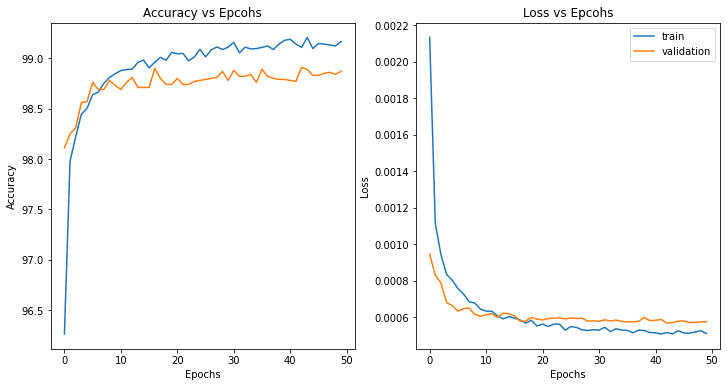

In [303]:
graph_acc_loss(train_acc1, val_acc1, train_loss1, val_loss1, glob)

In [304]:
##### BEST MODEL,MNIST #############
train_acc1, train_loss1, val_acc1, val_loss1, test_acc1 = runmnist.run('10')  #using dfw

E:\Suraj\University\Saarland\STUDIES\3d sem subjects\z_opt_ml\coderepo\datasets\mnist
Loading model trained on CIFAR10, to use on MNIST
loading best_dfw
model to be finetuned on MNIST
Regularization param: 	 0.0005
Loss function: MultiClassHingeLoss()
Optimizer: 	 DFW
Testing Accuracy of the network on the 10000 test images: 98.75 %


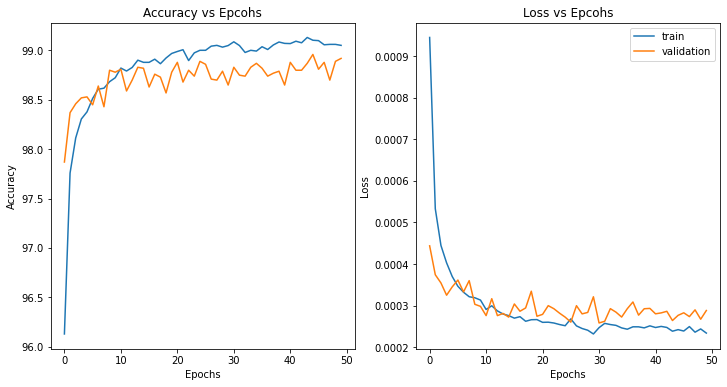

In [305]:
graph_acc_loss(train_acc1, val_acc1, train_loss1, val_loss1, glob)

In [310]:
test_acc1

90.15